# Analiza wyników studentów i badanie czynników wpływających na te wyniki
##### Wojciech Grzywocz, lab gr. 1


#### Zbiór danych został pobrany z Kaggle i znajduje się pod linkiem: https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset?resource=download#

Zbiór danych zawiera informacje o wynikach studentów oraz czynnikach,
które mogą mieć na nie wpływ:

- **Student_ID** – unikalny identyfikator studenta
- **First_Name** – imię studenta
- **Last_Name** – nazwisko studenta
- **Email** – adres e-mail kontaktowy
- **Gender** – płeć studenta: Male, Female, Other
- **Age** – wiek studenta
- **Department** – wydział / kierunek studiów
- **Attendance (%)** – frekwencja na zajęciach w procentach (0–100)
- **Midterm_Score** – wynik z egzaminu śródsemestralnego (0–100)
- **Final_Score** – wynik z egzaminu końcowego (0–100)
- **Assignments_Avg** – średnia ocen z zadań domowych (0–100)
- **Quizzes_Avg** – średnia ocen z kartkówek / kolokwiów (0–100)
- **Participation_Score** – ocena z aktywności na zajęciach (0–10)
- **Projects_Score** – ocena z projektów (0–100)
- **Total_Score** – łączny wynik punktowy studenta
- **Grade** – końcowa ocena literowa (A, B, C, D, F)
- **Study_Hours_per_Week** – średnia liczba godzin nauki w tygodniu
- **Extracurricular_Activities** – udział w zajęciach pozalekcyjnych (Yes/No)
- **Internet_Access_at_Home** – dostęp do internetu w domu (Yes/No)
- **Parent_Education_Level** – najwyższy poziom wykształcenia rodziców
  (None, High School, Bachelor, Master, PhD)
- **Family_Income_Level** – poziom dochodów rodziny (Low, Medium, High)
- **Stress_Level (1–10)** – samoocena poziomu stresu
  (1 – niski, 10 – wysoki)
- **Sleep_Hours_per_Night** – średnia liczba godzin snu na dobę

Zbiór danych zawiera **5000 rekordów**.


### Importy bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Wczytanie danych i wstępna obróbka przed dalszą analizą

In [2]:
df=pd.read_csv("Students Performance Dataset.csv")
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

Statystyki zmiennych numerycznych

In [4]:
df.describe()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,49.963720,74.78305,71.652097,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,28.989785,14.54243,7.230097,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,25.075000,61.97000,66.533875,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,49.600000,74.54000,71.696250,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,75.500000,87.63000,76.711625,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.00000,95.091500,30.000000,10.000000,9.000000


In [5]:
print("Rozmiar zbioru danych: ",df.shape)
print("\n Ilość NULLi w kolumnach: \n",df.isna().sum())
print("\n")
print("\n Liczba nie-NULLi w kolumnach:\n", df.count())

Rozmiar zbioru danych:  (5000, 23)

 Ilość NULLi w kolumnach: 
 Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                   0
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                  0
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1025
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64



 Liczba nie-NULLi w kolumnach:
 Student_ID                    5000
First_Name                    5000
Last_Name    

In [6]:
print(df["Parent_Education_Level"].unique())

["Master's" 'High School' nan "Bachelor's" 'PhD']


Nulle mamy tylko w kolumnie dotyczącej wykształcenia rodziców. Zamiast usuwać ponad 20% danych metodą dopna(), zrzutujemy wykształcenie na wartości liczbowe zachowując przy tym porządek i sens tej zmiennej.

In [7]:
edu_map = {
    "High School": 1,
    "Bachelor's": 2,
    "Master's": 3,
    "PhD": 4
}
df["Parent_Education_Level"] = (
    df["Parent_Education_Level"]
        .map(edu_map)
        .fillna(0)
        .astype(int)
)

df

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,3,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,1,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,1,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,1,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,3,Medium,6,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,51.66,53.5470,F,7.8,No,No,3,Medium,10,4.5
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,...,52.33,59.0240,F,24.2,No,Yes,0,Medium,4,7.2
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,89.94,50.84,65.83,...,97.89,74.7560,C,7.6,No,Yes,0,High,5,6.6
4998,S5998,Sara,Davis,student4998@university.com,Male,23,Engineering,99.09,55.44,57.45,...,84.74,68.6585,D,14.5,Yes,No,4,Medium,10,5.9


In [8]:
print("Rozmiar zbioru danych: ",df.shape)
print("\n Liczba nie NULLi w kolumnach:\n", df.count())

Rozmiar zbioru danych:  (5000, 23)

 Liczba nie NULLi w kolumnach:
 Student_ID                    5000
First_Name                    5000
Last_Name                     5000
Email                         5000
Gender                        5000
Age                           5000
Department                    5000
Attendance (%)                5000
Midterm_Score                 5000
Final_Score                   5000
Assignments_Avg               5000
Quizzes_Avg                   5000
Participation_Score           5000
Projects_Score                5000
Total_Score                   5000
Grade                         5000
Study_Hours_per_Week          5000
Extracurricular_Activities    5000
Internet_Access_at_Home       5000
Parent_Education_Level        5000
Family_Income_Level           5000
Stress_Level (1-10)           5000
Sleep_Hours_per_Night         5000
dtype: int64


Usuwamy kolumny: Student_ID, First_Name, Last_Name oraz Email, ponieważ nie będą potrzebne do dalszej analizy

In [9]:
df = df.drop(['Student_ID', 'First_Name','Last_Name','Email'], axis =1)
df.head()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,Female,22,Mathematics,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,F,10.3,Yes,No,3,Medium,1,5.9
1,Male,18,Business,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,B,27.1,No,No,1,Low,4,4.3
2,Male,24,Engineering,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,D,12.4,Yes,No,1,Low,9,6.1
3,Female,24,Engineering,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,F,25.5,No,Yes,1,Low,8,4.9
4,Female,23,CS,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,C,13.3,Yes,No,3,Medium,6,4.5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

Analiza unikalnych wartości w kolumnach

In [11]:
for col in df.columns:
    print(f"\n=== KOLUMNA: {col} ===")
    print(df[col].unique())


=== KOLUMNA: Gender ===
['Female' 'Male']

=== KOLUMNA: Age ===
[22 18 24 23 21 19 20]

=== KOLUMNA: Department ===
['Mathematics' 'Business' 'Engineering' 'CS']

=== KOLUMNA: Attendance (%) ===
[97.36 97.71 99.52 ... 85.66 76.77 90.33]

=== KOLUMNA: Midterm_Score ===
[40.61 57.27 41.84 ... 81.67 55.44 93.29]

=== KOLUMNA: Final_Score ===
[59.61 74.   63.85 ... 65.83 57.45 88.42]

=== KOLUMNA: Assignments_Avg ===
[73.69 74.23 85.85 ... 56.41 57.89 84.69]

=== KOLUMNA: Quizzes_Avg ===
[53.17 98.23 50.   ... 65.11 69.89 65.22]

=== KOLUMNA: Participation_Score ===
[ 73.4  88.    4.7   4.2  64.3  54.8  15.5  97.4  63.1  44.9  82.8  21.3
  41.4  52.8  50.5  92.1  29.3   5.7  91.6  21.7  37.9  53.1  97.6  53.5
  44.8  58.4  97.1  81.8  16.9  80.3  84.1  69.1  65.7  44.1  64.2  73.8
  12.3  25.7  19.4  68.   45.1  82.6  71.7  91.4   7.7  50.9  70.7  20.7
  32.7  41.9  79.4  49.4  49.3  43.1  22.9  92.3  31.8  56.7  14.9  43.4
  90.4  99.5  36.2  15.4  31.4  64.5  49.6  76.8  70.1  25.1  78.

W kolumnach Extracurricular_Activities oraz Internet_Access_at_Home zamieniamy wartości Yes i No na wartości 1 i 0

In [12]:
map_dict = {"Yes": 1, "No": 0}
df["Extracurricular_Activities"] = df["Extracurricular_Activities"].map(map_dict).astype(int)
df["Internet_Access_at_Home"] = df["Internet_Access_at_Home"].map(map_dict).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   object 
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

Zakodowanie zmiennych binarnych i zmiennych z określonym porządkiem na liczby

In [13]:
print(df["Gender"].unique())

['Female' 'Male']


In [14]:
map_dict = {"Male": 1, "Female": 0}
df["Gender"] = df["Gender"].map(map_dict).astype(int)
df.head()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0,22,Mathematics,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,F,10.3,1,0,3,Medium,1,5.9
1,1,18,Business,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,B,27.1,0,0,1,Low,4,4.3
2,1,24,Engineering,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,D,12.4,1,0,1,Low,9,6.1
3,0,24,Engineering,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,F,25.5,0,1,1,Low,8,4.9
4,0,23,CS,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,C,13.3,1,0,3,Medium,6,4.5


In [15]:
map_dict = {"Low": 1, "Medium": 2, "High": 3}
df["Family_Income_Level"] = df["Family_Income_Level"].map(map_dict).astype(int)
df.head()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0,22,Mathematics,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,F,10.3,1,0,3,2,1,5.9
1,1,18,Business,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,B,27.1,0,0,1,1,4,4.3
2,1,24,Engineering,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,D,12.4,1,0,1,1,9,6.1
3,0,24,Engineering,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,F,25.5,0,1,1,1,8,4.9
4,0,23,CS,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,C,13.3,1,0,3,2,6,4.5


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Gender                      5000 non-null   int64  
 1   Age                         5000 non-null   int64  
 2   Department                  5000 non-null   object 
 3   Attendance (%)              5000 non-null   float64
 4   Midterm_Score               5000 non-null   float64
 5   Final_Score                 5000 non-null   float64
 6   Assignments_Avg             5000 non-null   float64
 7   Quizzes_Avg                 5000 non-null   float64
 8   Participation_Score         5000 non-null   float64
 9   Projects_Score              5000 non-null   float64
 10  Total_Score                 5000 non-null   float64
 11  Grade                       5000 non-null   object 
 12  Study_Hours_per_Week        5000 non-null   float64
 13  Extracurricular_Activities  5000 

In [17]:
print(df["Grade"].unique())

['F' 'B' 'D' 'C' 'A']


In [18]:
map_dict = {"F":1, "D":2, "C":3, "B":4, "A":5}
df["Grade"] = df["Grade"].map(map_dict).astype(int)
df.head()

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,0,22,Mathematics,97.36,40.61,59.61,73.69,53.17,73.4,62.84,59.8865,1,10.3,1,0,3,2,1,5.9
1,1,18,Business,97.71,57.27,74.00,74.23,98.23,88.0,98.23,81.9170,4,27.1,0,0,1,1,4,4.3
2,1,24,Engineering,99.52,41.84,63.85,85.85,50.00,4.7,91.22,67.7170,2,12.4,1,0,1,1,9,6.1
3,0,24,Engineering,90.38,45.65,44.44,68.10,66.27,4.2,55.48,51.6535,1,25.5,0,1,1,1,8,4.9
4,0,23,CS,59.41,53.13,61.77,67.66,83.98,64.3,87.43,71.4030,3,13.3,1,0,3,2,6,4.5


Zmienne, binarne i te które można było zakodować liczbowo zachowując określony porządek zostały zakodowane na liczby w celu przyjemniejszej analizy. Jedyna zmienna, która pozostała jako tekst to Department/Wydział, ponieważ zakodowanie jej nie miało by sensu liczbowego bo wprowadziłoby sztuczny porządek między wydziałami.

### Badanie rozkładów poszczególnych zmiennych

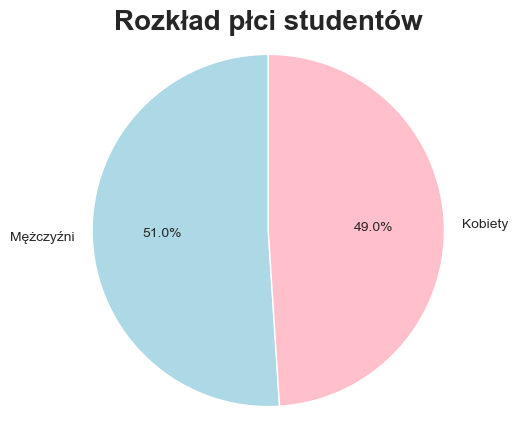

In [62]:
gender_counts = df['Gender'].value_counts()
#print(gender_counts)
plt.figure(figsize=(5,5))
plt.pie(gender_counts,
        labels={"Mężczyźni": 1, "Kobiety": 0},
        autopct='%1.1f%%',
        startangle=90,
        colors=['lightblue', 'pink', '#yellow'],
)

plt.title('Rozkład płci studentów', fontsize=20, fontweight='bold')
plt.axis('equal')
plt.show()

Wartości na wykresie są zbliżone do siebie, z niewielką przewagą mężczyzn. Można jednak zauważyć, że są to proporcje podobne do tych przy narodzinach.

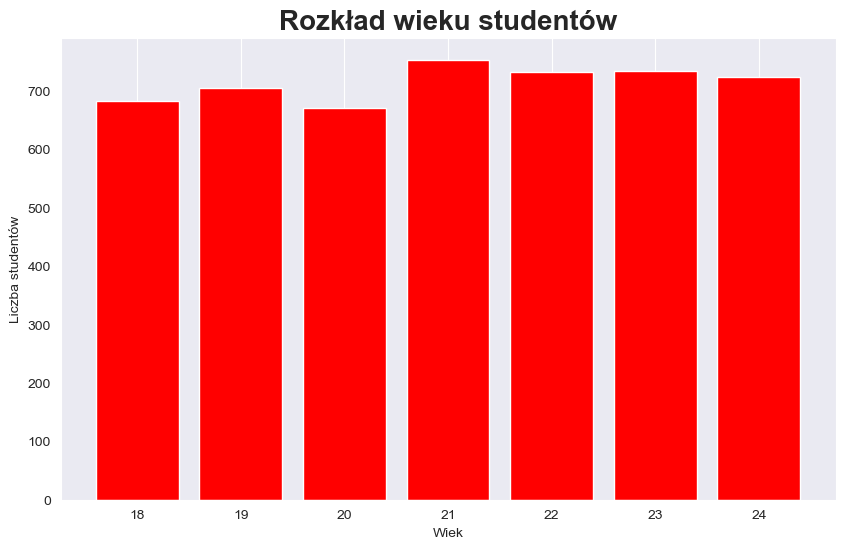

In [28]:
plt.figure(figsize=(10, 6))

age_counts = df['Age'].value_counts().sort_index()
plt.bar(
    age_counts.index,
    age_counts.values,
    color='red',
)

plt.title('Rozkład wieku studentów', fontsize=20, fontweight='bold')
plt.xlabel('Wiek')
plt.ylabel('Liczba studentów')
plt.xticks(age_counts.index)

plt.grid(axis='y')
plt.show()

Rozkład pod względem wieku jest dosyć jednostajny z przewagą starszych studentów 21+

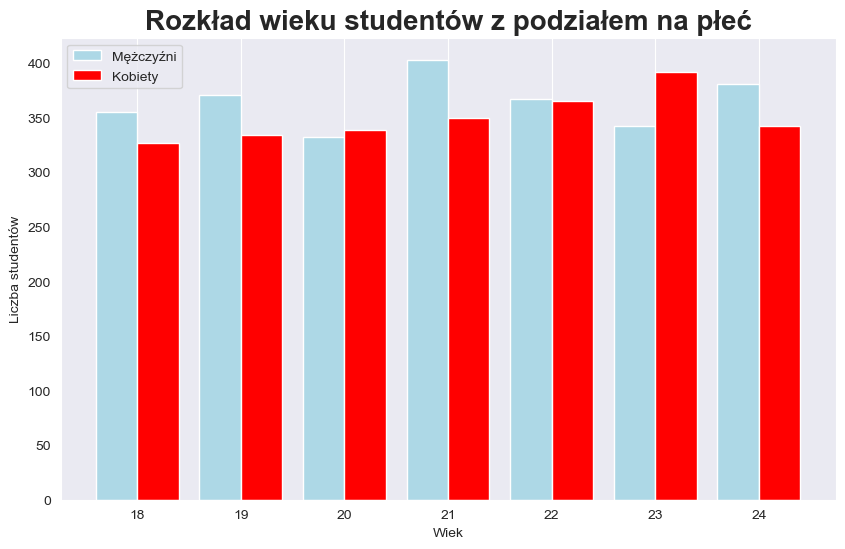

In [38]:
plt.figure(figsize=(10, 6))
age_counts_male = df[df['Gender'] == 1]['Age'].value_counts().sort_index()
age_counts_female  = df[df['Gender'] == 0]['Age'].value_counts().sort_index()

width = 0.4

plt.bar(
    age_counts_male.index - width/2,
    age_counts_male.values,
    width = width,
    color='lightblue',
    label = "Mężczyźni",
)

plt.bar(
    age_counts_female.index + width/2,
    age_counts_female.values,
    width = width,
    color='red',
    label = "Kobiety",
)

plt.title('Rozkład wieku studentów z podziałem na płeć', fontsize=20, fontweight='bold')
plt.xlabel('Wiek')
plt.ylabel('Liczba studentów')
plt.xticks(age_counts.index)
plt.legend(loc='best')

plt.grid(axis='y')
plt.show()

Kobiety przeważają liczebnie tylko w grupie 20 i 23 latków, w pozostałych grupach wiekowych to mężczyzn jest więcej

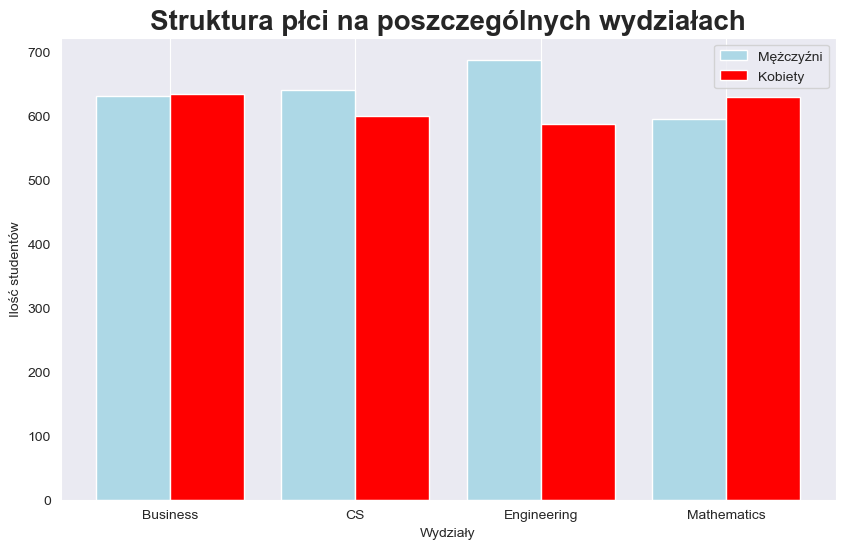

In [39]:
mezczyzni = df[df["Gender"]==1]["Department"].value_counts().sort_index()
kobiety = df[df["Gender"]==0]["Department"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
width = 0.4

plt.bar(
    [(i - width/2) for i in range(4)] ,
    mezczyzni.values,
    width = width,
    color='lightblue',
    label='Mężczyźni'
)
plt.bar(
    [(i + width/2) for i in range(4)] ,
    kobiety.values,
    width = width,
    color='red',
    label='Kobiety'
)
plt.title("Struktura płci na poszczególnych wydziałach", fontsize=20, fontweight='bold')
plt.xlabel("Wydziały")
plt.ylabel("Ilość studentów")
plt.xticks(range(4),mezczyzni.index)
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()

Widzimy, że największa dysproporcja jest na wydziale Inżynierii gdzie przeważają mężczyźni. Kobiet jest z kolei więcej na wydziale Matematyki i na wydziale Biznesowym, lecz w tym przypadku  różnica w liczebności jest naprawdę niewielka.

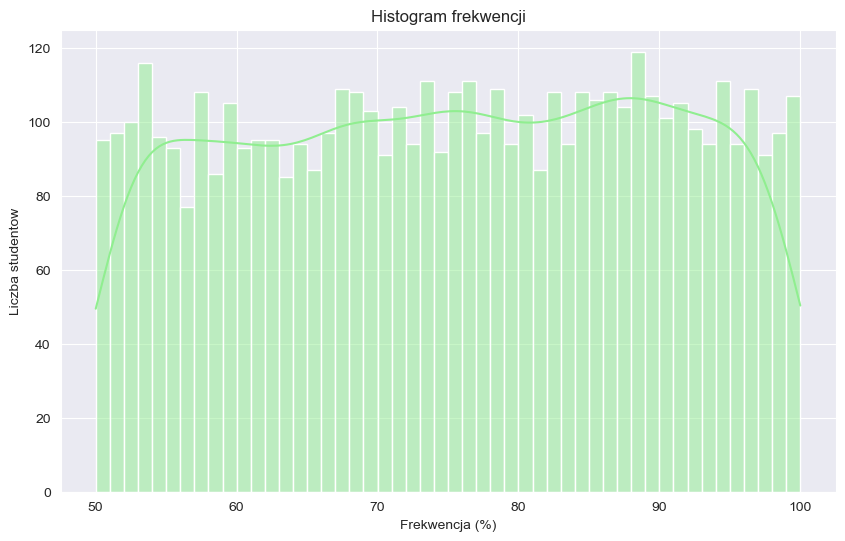

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="Attendance (%)",
    bins=50,
    kde=True,
    color='lightgreen',
)

plt.title("Histogram frekwencji")
plt.xlabel("Frekwencja (%)")
plt.ylabel("Liczba studentow")
plt.show()

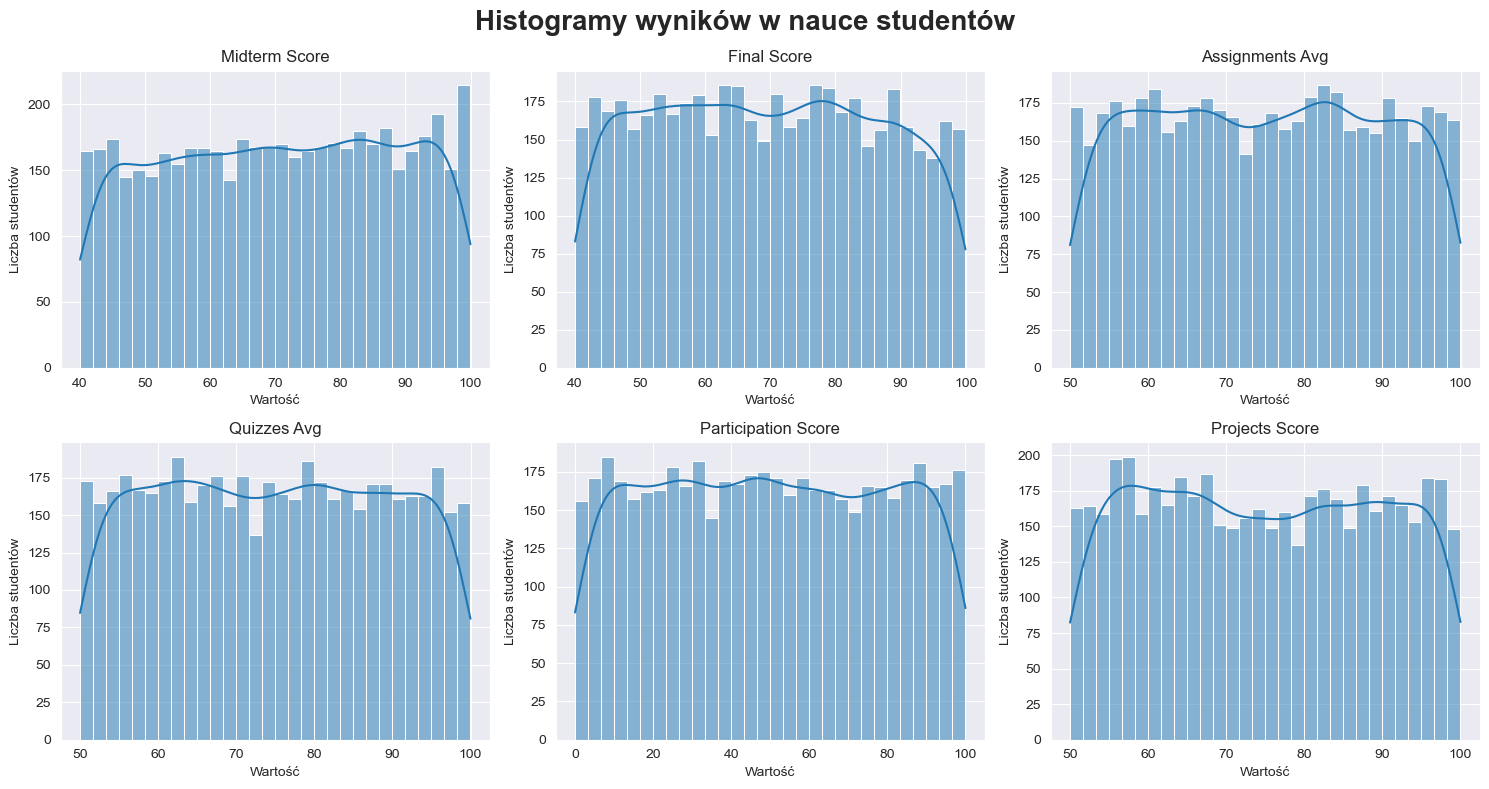

In [46]:
features = [
    "Midterm_Score",
    "Final_Score",
    "Assignments_Avg",
    "Quizzes_Avg",
    "Participation_Score",
    "Projects_Score"
]

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for ax, feature in zip(axes, features):
    sns.histplot(
        data=df,
        x=feature,
        bins=30,
        kde=True,
        ax=ax
    )
    ax.set_title(feature.replace("_", " "))
    ax.set_xlabel("Wartość")
    ax.set_ylabel("Liczba studentów")

fig.suptitle("Histogramy wyników w nauce studentów", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

W przypadku egzaminów śródsemestralnych możemy zauważyć tendencję wzrostową w kierunku wyższych wartości, co świadczy o tym, że studenci raczej uzyskiwali dobre oceny z tej formy sprawdzania wiedzy. Jednak w przypadku egzaminu końcowego sytuacja wygląda odwrotnie i więcej studentów usyskiwało raczej niezbyt zadowalające wyniki. W przypadku zadań można dostrzec sporą grupę przeważającą nad pozostałymi - są to studenci którzy uzyskali ok. 80%. Wyniki z quizów oraz aktywności mają dosyć jednostajny rozkład, natomiast przy projektach studenci wypadali bardzo różnie, ponieważ widzimy sporą grupę, która uzyskała wynik poniżej 70%, ale jest również duża grupa, która uzyskała wynik większy od 80%, najmniejszą grupę stanowią tutaj, co ciekawe, studenci ze średnimi wynikami czyli ok. 75%

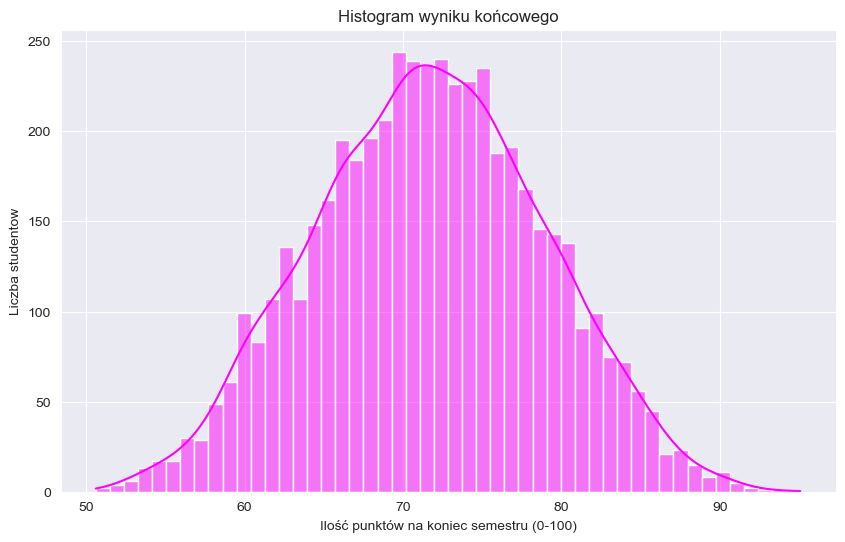

Test Kołmogorowa-Smirnowa: 0.013694486453678018, p-value: 0.3027417171776702


In [56]:
from scipy import stats

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="Total_Score",
    bins=50,
    kde=True,
    color='magenta',
)

plt.title("Histogram wyniku końcowego")
plt.xlabel("Ilość punktów na koniec semestru (0-100)")
plt.ylabel("Liczba studentow")
plt.show()

D_test_stat, p_value = stats.kstest(df["Total_Score"], 'norm', args=(df["Total_Score"].mean(),df["Total_Score"].std()) )
print(f"Test Kołmogorowa-Smirnowa: {D_test_stat}, p-value: {p_value}")

Rozkład wyniku na koniec semestru przypomina rozkład normalny. Dodatkowo z przeprowadzonego testu Kołmogorowa-Smirnowa nie mamy podstaw do odrzucenia hipotezy, że jest to rozkład normalny.

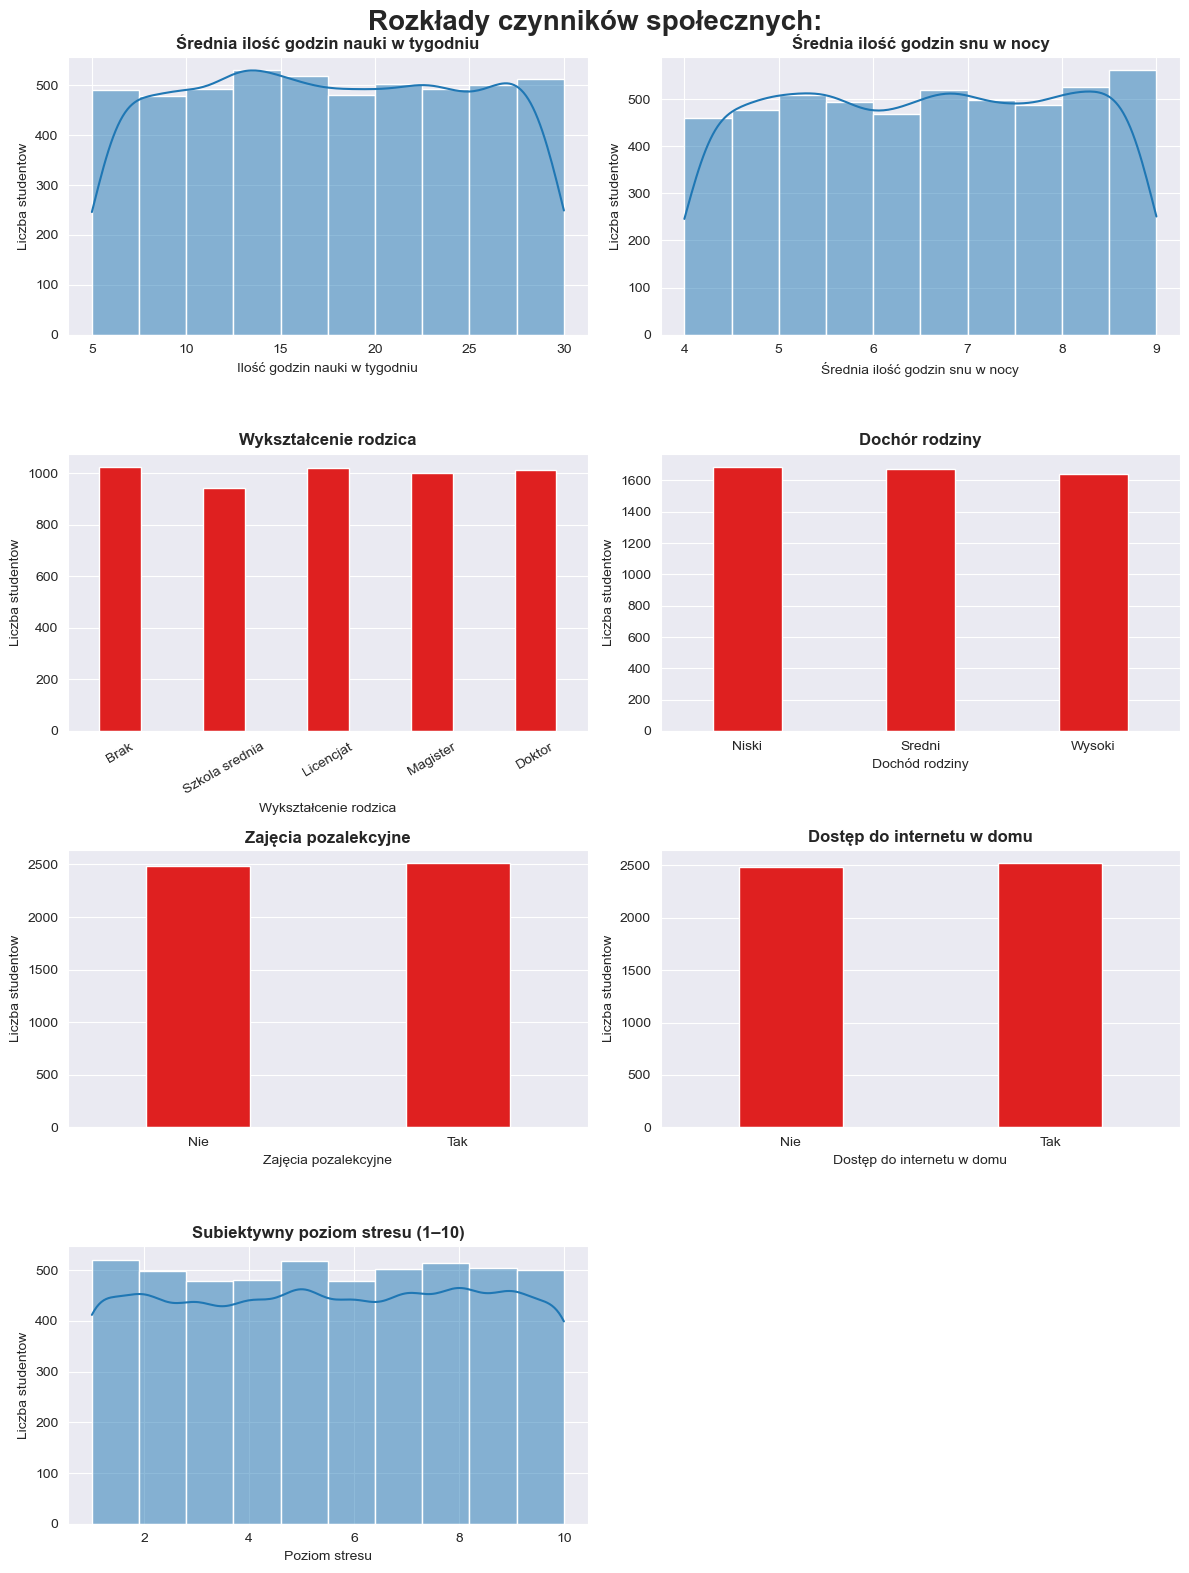

In [68]:
zmienne=["Study_Hours_per_Week","Parent_Education_Level", "Extracurricular_Activities","Internet_Access_at_Home","Family_Income_Level","Stress_Level (1-10)", "Sleep_Hours_per_Night"]

plt.figure(figsize=(12, 16))
plt.suptitle("Rozkłady czynników społecznych:", fontsize=20, fontweight='bold')

plt.subplot(4, 2, 1)
sns.histplot(df["Study_Hours_per_Week"], bins=10, kde=True)
plt.title("Średnia ilość godzin nauki w tygodniu", fontweight='bold')
plt.ylabel("Liczba studentow")
plt.xlabel("Ilość godzin nauki w tygodniu")

plt.subplot(4, 2, 2)
sns.histplot(df["Sleep_Hours_per_Night"], bins=10, kde=True)
plt.title("Średnia ilość godzin snu w nocy", fontweight='bold')
plt.ylabel("Liczba studentow")
plt.xlabel("Średnia ilość godzin snu w nocy")

plt.subplot(4, 2, 3)
sns.countplot(x=df["Parent_Education_Level"], color="red", width=0.4)
plt.title("Wykształcenie rodzica", fontweight='bold')
plt.xticks(
    ticks=[0, 1, 2, 3, 4],
    labels=["Brak", "Szkola srednia", "Licencjat", "Magister", "Doktor"],
    rotation=30
)
plt.ylabel("Liczba studentow")
plt.xlabel("Wykształcenie rodzica")

plt.subplot(4, 2, 4)
sns.countplot(x=df["Family_Income_Level"], color="red", width=0.4)
plt.title("Dochór rodziny", fontweight='bold')
plt.xticks(
    ticks=[0,1,2],
    labels=["Niski", "Sredni", "Wysoki"]
)
plt.ylabel("Liczba studentow")
plt.xlabel("Dochód rodziny")

plt.subplot(4, 2, 5)
sns.countplot(x=df["Extracurricular_Activities"], color="red", width=0.4)
plt.title("Zajęcia pozalekcyjne", fontweight='bold')
plt.ylabel("Liczba studentow")
plt.xlabel("Zajęcia pozalekcyjne")
plt.xticks(
    ticks=[0, 1],
    labels=["Nie", "Tak"]
)

plt.subplot(4, 2, 6)
sns.countplot(x=df["Internet_Access_at_Home"], color="red", width=0.4)
plt.title("Dostęp do internetu w domu", fontweight='bold')
plt.ylabel("Liczba studentow")
plt.xlabel("Dostęp do internetu w domu")
plt.xticks(
    ticks=[0, 1],
    labels=["Nie", "Tak"]
)

plt.subplot(4, 2, 7)
sns.histplot(df["Stress_Level (1-10)"], bins=10, kde=True)
plt.title("Subiektywny poziom stresu (1–10)", fontweight='bold')
plt.xlabel("Poziom stresu")
plt.ylabel("Liczba studentow")

plt.tight_layout()
plt.show()

Jak widzimy wszystkie z powyższych zmiennych są dosyć jednostajnie rozłożone

### Macierz korelacji

In [69]:
df2 = df.copy()
df2.drop(["Department","Grade"],axis=1,inplace=True)

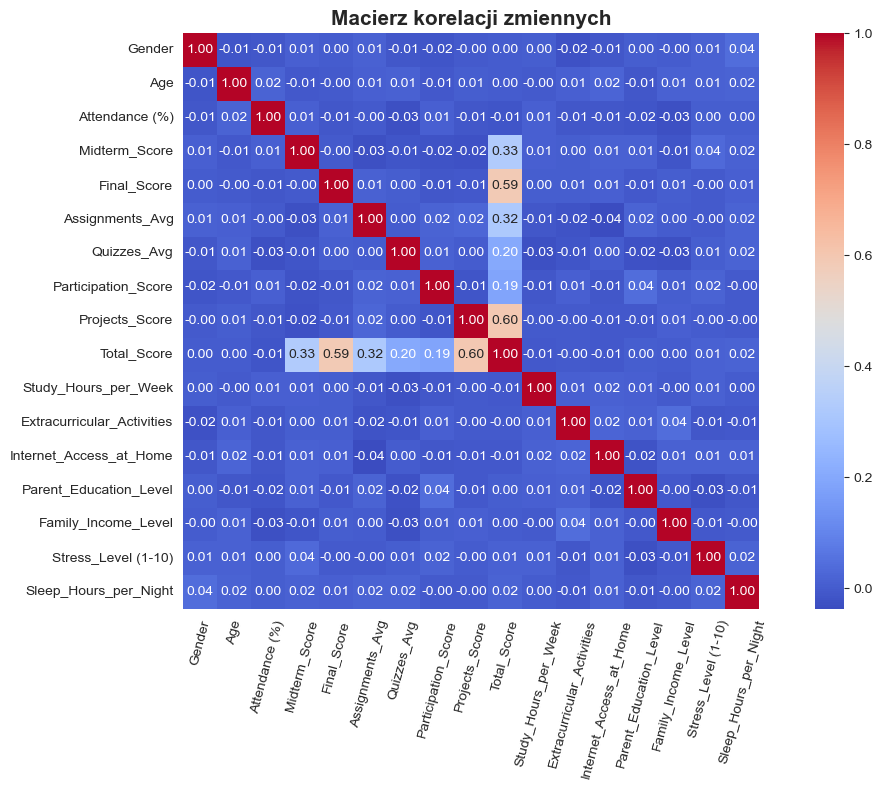

In [70]:
corr_matrix = df2.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            square=True)
plt.xticks(rotation=75)
plt.title("Macierz korelacji zmiennych", fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

Obserwując korelację z wynikiem końcowym możemy zauważyć, że największa taka zależność jest dla oceny z projektu oraz oceny z egzaminu. Następnie nieco mniej skorelowane są oceny z zadań oraz ocena z egzaminu śródsemestralnego. Jeszcze mniejsza korelacji jest dla ocen z quizów oraz ocen z aktywności. Co ciekawe pozostałe składniki i zmienne środowiskowe wydają się prawie nie mieć korelacji z oceną końcową.

### Zależności między danymi

Czynniki środowiskowe

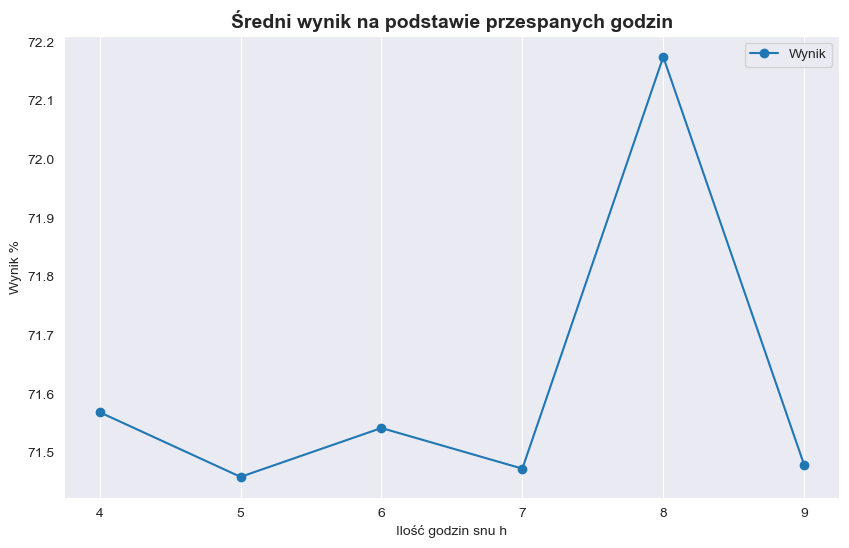

In [87]:
dfpom = df.copy()
dfpom["Sleep_Hours_per_Night"] = dfpom["Sleep_Hours_per_Night"].round(0)
avarege_result_sleep = dfpom.groupby('Sleep_Hours_per_Night')['Total_Score'].mean()
#print(avarege_result_sleep)

plt.figure(figsize=(10,6))
plt.plot(
    avarege_result_sleep.index,
    avarege_result_sleep.values,
    label="Wynik",
    marker="o",
)
plt.legend(loc="best")
plt.xlabel("Ilość godzin snu h")
plt.ylabel("Wynik %")
plt.grid(axis='y')


plt.title("Średni wynik na podstawie przespanych godzin",fontsize=16, fontweight='bold')
plt.show()

Najlepszy wynik uzyskują osoby śpiące zalecane 8 godzin, a wyższa ilość godzin snu niekoniecznie przekłada się na lepszy wynik.

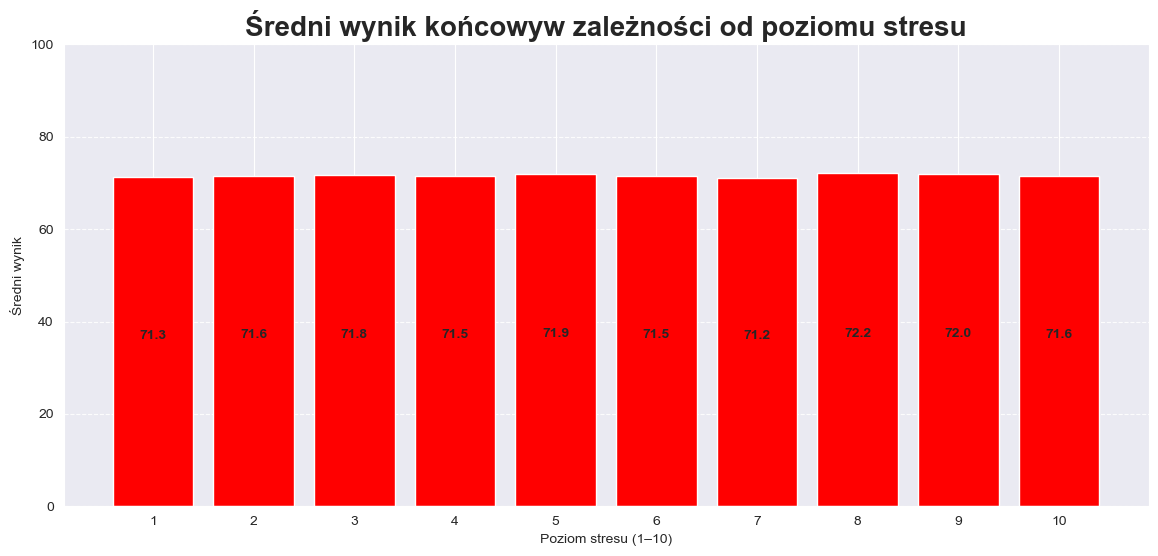

In [96]:
stress_score = df.groupby('Stress_Level (1-10)')['Total_Score'].mean()

plt.figure(figsize=(14, 6))

bars = plt.bar(
    stress_score.index,
    stress_score.values,
    color='red',
)

plt.title('Średni wynik końcowyw zależności od poziomu stresu', fontsize=20, fontweight='bold')
plt.xlabel('Poziom stresu (1–10)')
plt.ylabel('Średni wynik')
plt.xticks(range(1, 11))
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.9, linestyle='--')
for bar in bars:
    heigth = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, heigth/2, f'{heigth:.1f}', ha='center', va='bottom', fontweight='bold')


Stres jak widać nie wpływa mocno na wynik końcowy. Najlepszy wynik osiągały osoby, które deklarowały umiarkowany stres 8 na 10 i był on tylko minimalnie wyższym wynikiem niż najgorszy uzyskany wynik przez osoby ze stresem ocenionym na 7.

Średni wynik osób gdzie dochód jest niski:  71.71
Średni wynik osób gdzie dochód jest średni:  71.54
Średni wynik osób gdzie dochód jest wysoki:  71.71


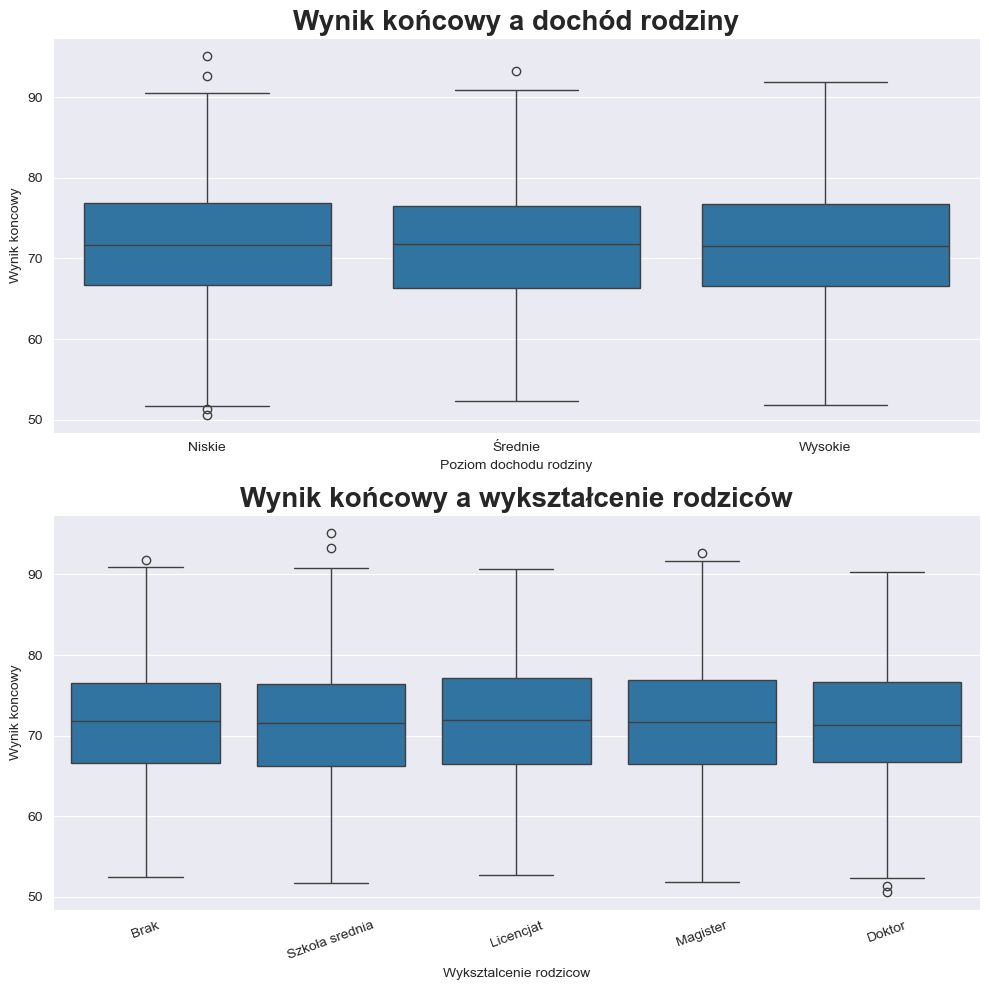

Średni wynik osób gdzie rodzic ma wykształcenie podstawowe lub brak:  71.58
Średni wynik osób gdzie rodzic ma wykształcenie średnie:  71.45
Średni wynik osób gdzie rodzic ma licencjat:  71.98
Średni wynik osób gdzie rodzic ma tytuł magistra:  71.65
Średni wynik osób gdzie rodzic ma tytuł doktora:  71.58


In [100]:
sr_n = df[df["Family_Income_Level"]==1]["Total_Score"].mean().round(2)
sr_s = df[df["Family_Income_Level"]==2]["Total_Score"].mean().round(2)
sr_w = df[df["Family_Income_Level"]==3]["Total_Score"].mean().round(2)

print("Średni wynik osób gdzie dochód jest niski: ", sr_n)
print("Średni wynik osób gdzie dochód jest średni: ", sr_s)
print("Średni wynik osób gdzie dochód jest wysoki: ", sr_w)

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.boxplot(
    data=df,
    x="Family_Income_Level",
    y="Total_Score"
)
plt.title("Wynik końcowy a dochód rodziny", fontsize=20, fontweight='bold')
plt.xlabel("Poziom dochodu rodziny")
plt.ylabel("Wynik koncowy")
plt.xticks(
    ticks=[0,1, 2],
    labels=["Niskie", "Średnie", "Wysokie"]
)

plt.subplot(2, 1, 2)
sns.boxplot(
    data=df,
    x="Parent_Education_Level",
    y="Total_Score"
)

plt.title("Wynik końcowy a wykształcenie rodziców", fontsize=20, fontweight='bold')
plt.xlabel("Wyksztalcenie rodzicow")
plt.ylabel("Wynik koncowy")
plt.xticks(
    ticks=[0, 1, 2, 3, 4],
    labels=[
        "Brak",
        "Szkoła srednia",
        "Licencjat",
        "Magister",
        "Doktor"
    ],
    rotation=20
)
plt.tight_layout()
plt.show()

sr_1 = df[df["Parent_Education_Level"]==0]["Total_Score"].mean().round(2)
sr_2 = df[df["Parent_Education_Level"]==1]["Total_Score"].mean().round(2)
sr_3 = df[df["Parent_Education_Level"]==2]["Total_Score"].mean().round(2)
sr_4 = df[df["Parent_Education_Level"]==3]["Total_Score"].mean().round(2)
sr_5 = df[df["Parent_Education_Level"]==4]["Total_Score"].mean().round(2)


print("Średni wynik osób gdzie rodzic ma wykształcenie podstawowe lub brak: ", sr_1)
print("Średni wynik osób gdzie rodzic ma wykształcenie średnie: ", sr_2)
print("Średni wynik osób gdzie rodzic ma licencjat: ", sr_3)
print("Średni wynik osób gdzie rodzic ma tytuł magistra: ", sr_4)
print("Średni wynik osób gdzie rodzic ma tytuł doktora: ", sr_5)


Można postawić hipotezę że czynniki rodzinne nie wpływają istotnie statystycznie na wynik końcowy na koniec semestru podobnie jak analizowany wcześniej poziom stresu

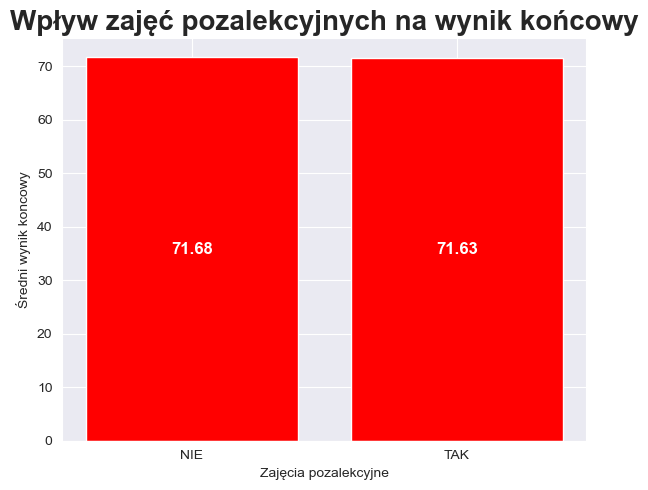

In [103]:
means = df.groupby("Extracurricular_Activities")["Total_Score"].mean()
labels = ["NIE", "TAK"]
values = means.values

plt.figure(figsize=(6, 5))
bars = plt.bar(
    labels,
    values,
    color="red"
)
plt.title("Wpływ zajęć pozalekcyjnych na wynik końcowy", fontsize=20, fontweight='bold')
plt.xlabel("Zajęcia pozalekcyjne")
plt.ylabel("Średni wynik koncowy")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f"{height:.2f}",
        ha="center",
        va="center",
        color="white",
        fontsize=12,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()



Osoby, które nie uczęszczały na zajęcia pozalekcyjne osiągały nieco lepsze wyniki ale znów nie jest to znacząca różnica.

101 101


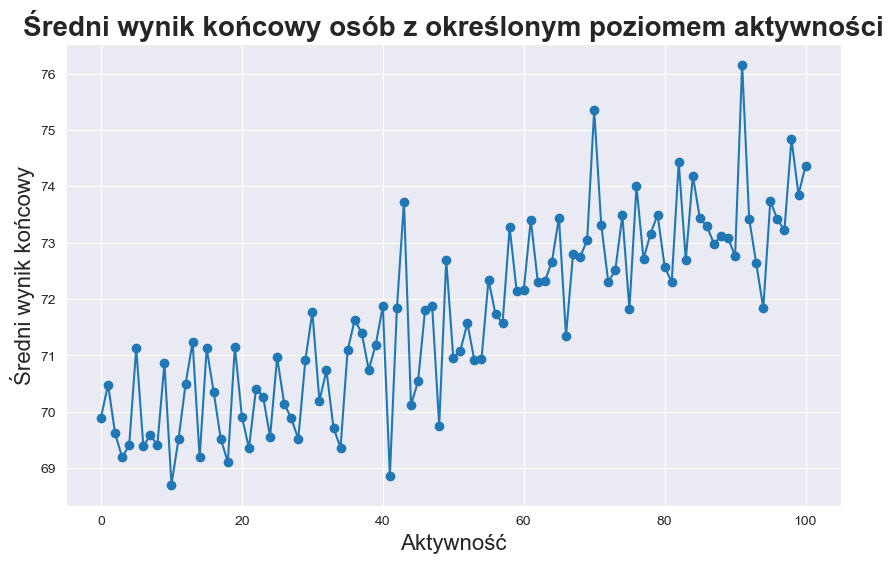

In [75]:
dfpom["Participation_round"]=dfpom["Participation_Score"].round(0)
x=dfpom["Participation_round"].unique()
x=pd.Series(x).sort_values().reset_index(drop=True)

y=dfpom.groupby("Participation_round")["Total_Score"].mean() #Participation juz posortowane
y=y.values

print(len(x),len(y))

plt.figure(figsize=(10,6))
plt.plot(x,y,marker='o')
plt.xlabel("Aktywność",fontsize=16)
plt.ylabel("Średni wynik końcowy",fontsize=16)
plt.title("Średni wynik końcowy osób z określonym poziomem aktywności",fontsize=20, fontweight='bold')
plt.show()

Wykres nie jest regularny, ale możemy zauważyć trend wzrostowy, że większa aktywność przekłada się na wyższy wynik końcowy

51 51


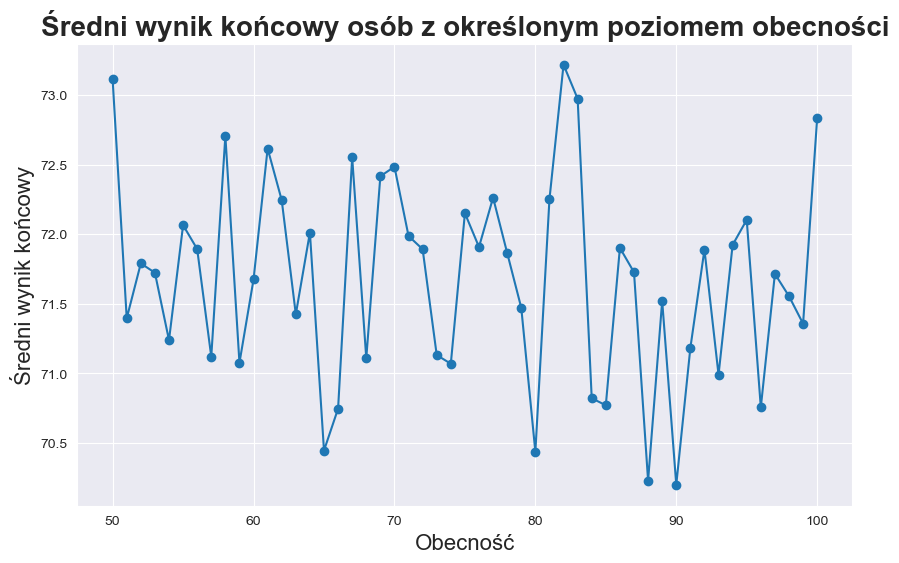

In [76]:
dfpom["Attendance_round"]=dfpom["Attendance (%)"].round(0)
x=dfpom["Attendance_round"].unique()
x=pd.Series(x).sort_values().reset_index(drop=True)

y=dfpom.groupby("Attendance_round")["Total_Score"].mean() #Attendance juz posortowane
y=y.values


print(len(x),len(y))

plt.figure(figsize=(10,6))
plt.plot(x,y,marker='o')
plt.xlabel("Obecność",fontsize=16)
plt.ylabel("Średni wynik końcowy",fontsize=16)
plt.title("Średni wynik końcowy osób z określonym poziomem obecności",fontsize=20, fontweight='bold')
plt.show()

Wykres jest mocno nie regularny ale widać delikatny trend spadkowy, aby lepiej to zbadać odwróćmy podejście i zobaczmy średnią obecność dla osób z określoną oceną.

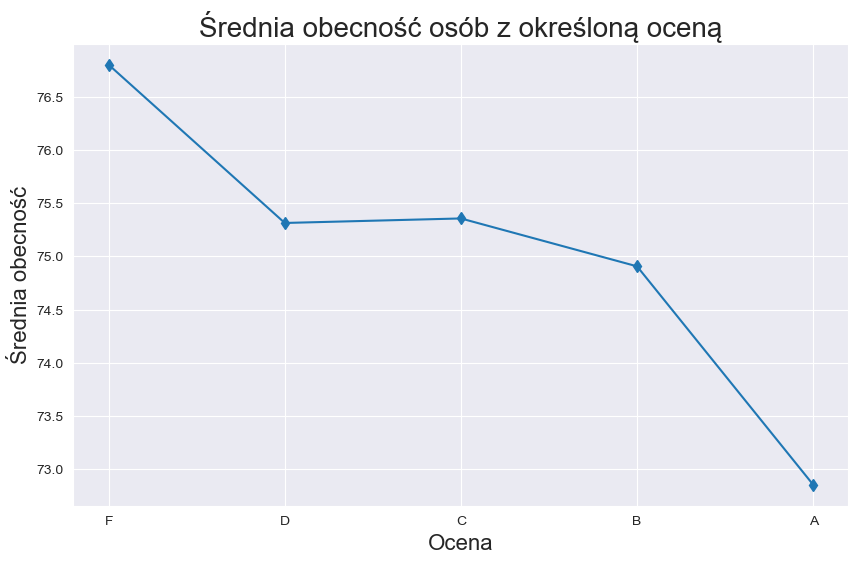

In [80]:
x=[1,2,3,4,5]
y=df.groupby("Grade")["Attendance (%)"].mean()
y=y.sort_index(ascending=True)

plt.figure(figsize=(10,6))
plt.plot(x,y,marker='d')
plt.xlabel("Ocena",fontsize=16)
plt.ylabel("Średnia obecność",fontsize=16)
plt.xticks(range(1,6),['F','D','C','B','A'])
plt.title("Średnia obecność osób z określoną oceną",fontsize=20)
plt.show()

Hipoteza o trendzie spadkowym się potwierdziła. Na wykresie możemy zaobserwować, że osoby z wyższą oceną końcową notowały niższą obecność na zajęciach. Można zakładać, że nie pojawiając się na zajęciach osoby te przeznaczały czas na efektywną naukę w dopasowanym dla siebie stylu bądź poświęcały czas na aktywność dodatkową, która rozwijała ich wiedzę i przełożyła się na wyższy wynik końcowy na uczelni.

Średni wynik końcowy dla kobiet:  71.64
Średni wynik końcowy dla mężczyzn:  71.66


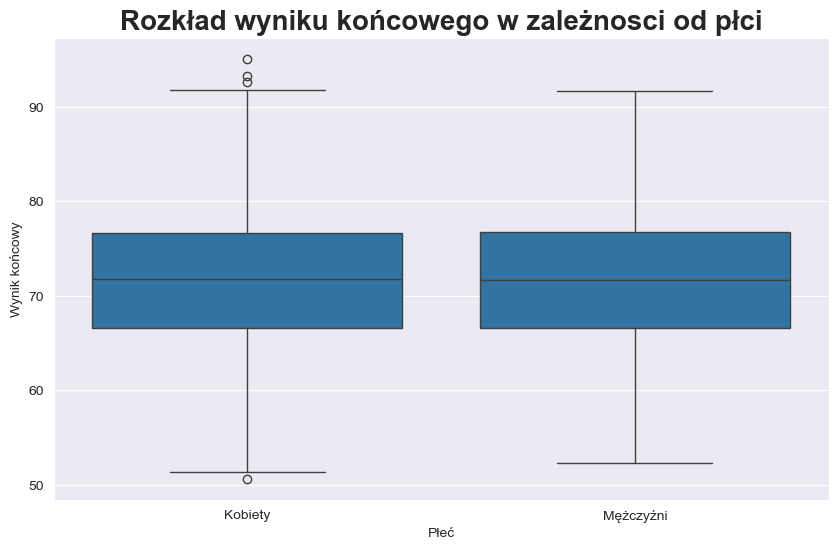

In [94]:
sr_k = df[df["Gender"]==0]["Total_Score"].mean().round(2)
sr_m = df[df["Gender"]==1]["Total_Score"].mean().round(2)
print("Średni wynik końcowy dla kobiet: ", sr_k)
print("Średni wynik końcowy dla mężczyzn: ", sr_m)

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Gender",
    y="Total_Score"
)
plt.title("Rozkład wyniku końcowego w zależnosci od płci", fontsize=20, fontweight='bold')
plt.xlabel("Płeć")
plt.ylabel("Wynik końcowy")
plt.xticks(
    ticks=[0, 1],
    labels=["Kobiety", "Mężczyźni"]
)

plt.show()

Wyniki u kobiet i mężczyzn są identyczne

26 26


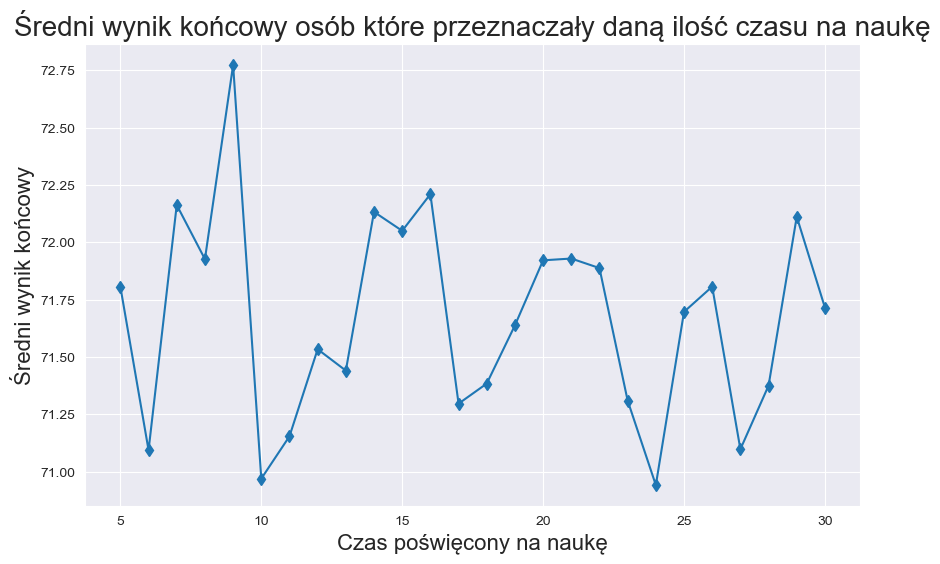

In [88]:
dfpom["Study_hours_round"]=dfpom["Study_Hours_per_Week"].round(0)
x=dfpom["Study_hours_round"].unique()
x=pd.Series(x).sort_values().reset_index(drop=True)

y=dfpom.groupby("Study_hours_round")["Total_Score"].mean()
y=y.values
y=pd.Series(y).reset_index(drop=True)


print(len(x),len(y))

plt.figure(figsize=(10,6))
plt.plot(x,y,marker='d')
plt.xlabel("Czas poświęcony na naukę",fontsize=16)
plt.ylabel("Średni wynik końcowy",fontsize=16)
plt.title("Średni wynik końcowy osób które przeznaczały daną ilość czasu na naukę",fontsize=20, fontweight='bold')
plt.show()

Wykres jest nie regularny, więc odwróćmy podejście

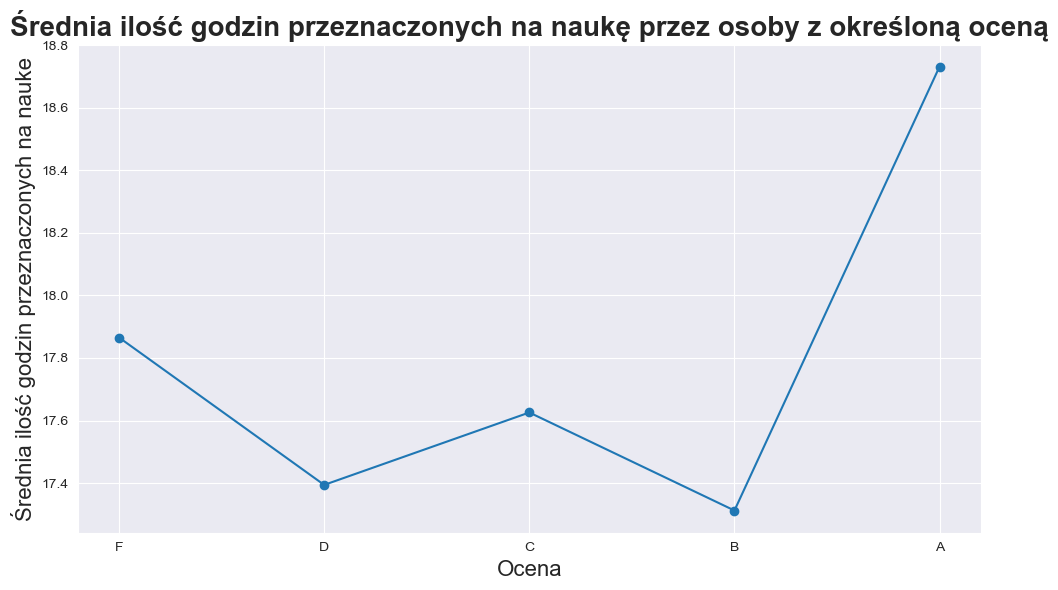

In [89]:
x=[1,2,3,4,5]
y=df.groupby("Grade")["Study_Hours_per_Week"].mean()

plt.figure(figsize=(10,6))
plt.plot(x,y,marker='o')
plt.xlabel("Ocena",fontsize=16)
plt.ylabel("Średnia ilość godzin przeznaczonych na nauke",fontsize=16)
plt.xticks(range(1,6),["F","D","C","B","A"])
plt.title("Średnia ilość godzin przeznaczonych na naukę przez osoby z określoną oceną",fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

Najwięcej na naukę poświęcili studenci z najlepszą oceną, jednak drudzy pod tym względem byli studenci o najgorszej ocenie co może świadczyć o nieefektywności ich nauki.

61 61


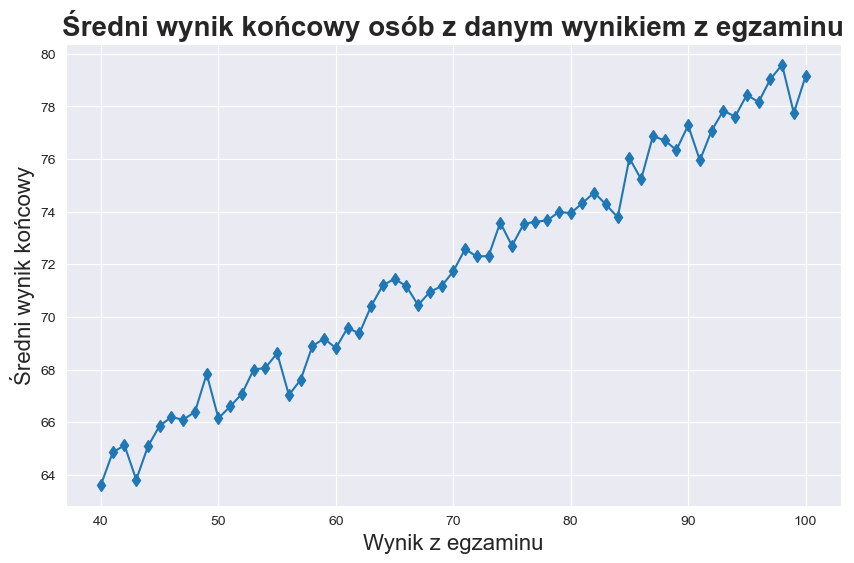

In [105]:
dfpom["Final_Score"]=dfpom["Final_Score"].round(0)
x=dfpom["Final_Score"].unique()
x=pd.Series(x).sort_values().reset_index(drop=True)

y=dfpom.groupby("Final_Score")["Total_Score"].mean()
y=y.values
y=pd.Series(y).reset_index(drop=True)


print(len(x),len(y))

plt.figure(figsize=(10,6))
plt.plot(x,y,marker='d')
plt.xlabel("Wynik z egzaminu",fontsize=16)
plt.ylabel("Średni wynik końcowy",fontsize=16)
plt.title("Średni wynik końcowy osób z danym wynikiem z egzaminu",fontsize=20, fontweight='bold')
plt.show()

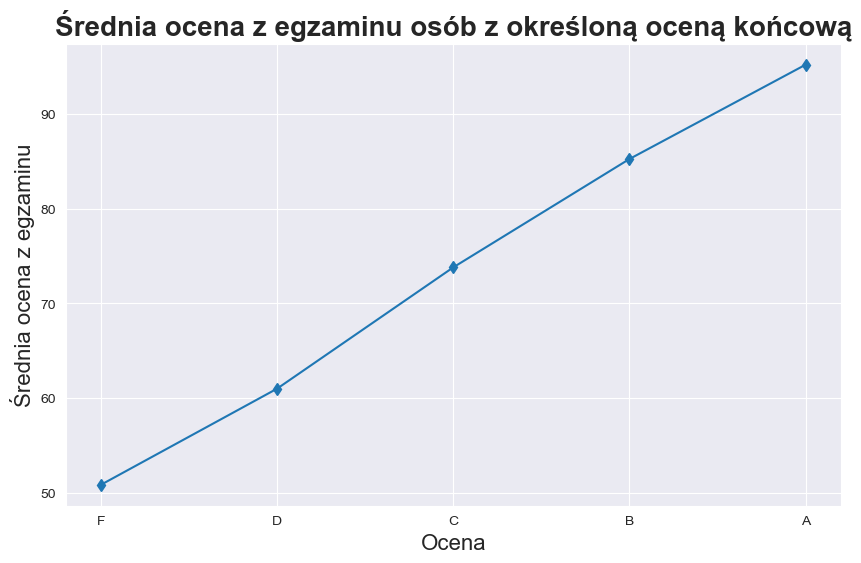

In [106]:
x=[1,2,3,4,5]
y=df.groupby("Grade")["Final_Score"].mean()
y=y.sort_index(ascending=True)

plt.figure(figsize=(10,6))
plt.plot(x,y,marker='d')
plt.xlabel("Ocena",fontsize=16)
plt.ylabel("Średnia ocena z egzaminu",fontsize=16)
plt.xticks(range(1,6),['F','D','C','B','A'])
plt.title("Średnia ocena z egzaminu osób z określoną oceną końcową",fontsize=20, fontweight='bold')
plt.show()

Widzimy, że informacj z macierzy korelacji się potwierddza i mamy prawie liniową zależność między wynikiem z egzaminu a wynikiem końcowym.

51 51


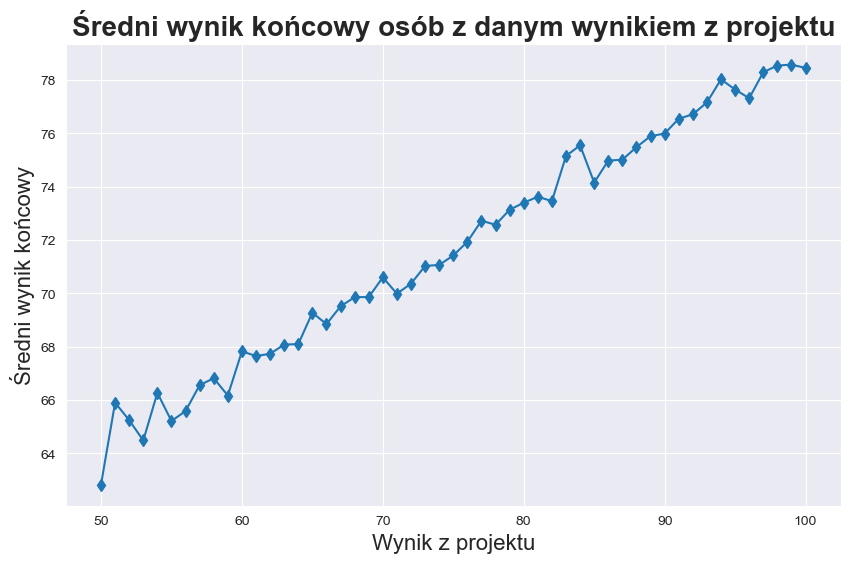

In [107]:
dfpom["Projects_Score"]=dfpom["Projects_Score"].round(0)
x=dfpom["Projects_Score"].unique()
x=pd.Series(x).sort_values().reset_index(drop=True)

y=dfpom.groupby("Projects_Score")["Total_Score"].mean()
y=y.values
y=pd.Series(y).reset_index(drop=True)


print(len(x),len(y))

plt.figure(figsize=(10,6))
plt.plot(x,y,marker='d')
plt.xlabel("Wynik z projektu",fontsize=16)
plt.ylabel("Średni wynik końcowy",fontsize=16)
plt.title("Średni wynik końcowy osób z danym wynikiem z projektu",fontsize=20, fontweight='bold')
plt.show()

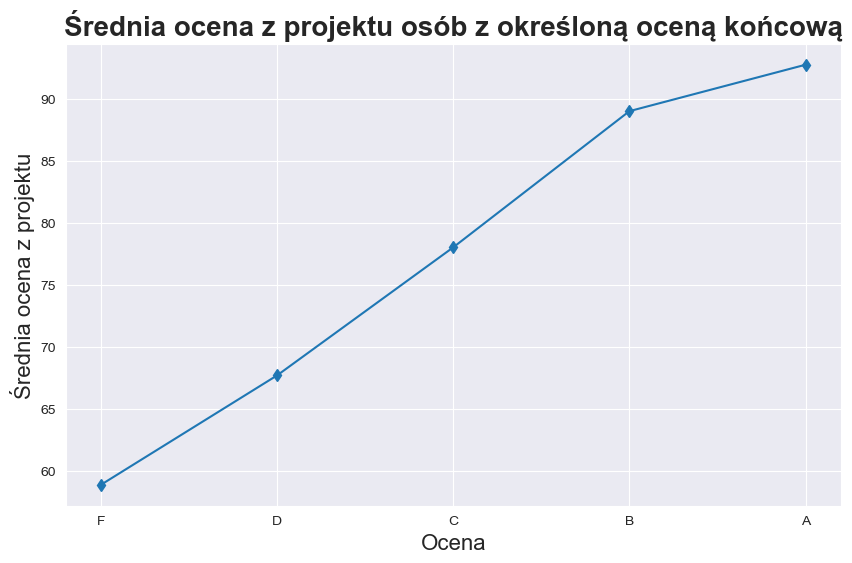

In [108]:
x=[1,2,3,4,5]
y=df.groupby("Grade")["Projects_Score"].mean()
y=y.sort_index(ascending=True)

plt.figure(figsize=(10,6))
plt.plot(x,y,marker='d')
plt.xlabel("Ocena",fontsize=16)
plt.ylabel("Średnia ocena z projektu",fontsize=16)
plt.xticks(range(1,6),['F','D','C','B','A'])
plt.title("Średnia ocena z projektu osób z określoną oceną końcową",fontsize=20, fontweight='bold')
plt.show()

W przypadku projektu również informacja z macierzy korelacji nam się potwierdza i mamy mocną zależność między oceną z projektu a oceną końcową studenta